In [1]:
from glob import glob
import os, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
# make the necessary conversion
read_hu = lambda x: imread(x).astype(np.float32)-32768
base_img_dir = 'E:\DeepLesion'

In [2]:
patient_df = pd.read_csv('E:\DeepLesion\DL_info.csv')
patient_df['Radius'] = patient_df['Lesion_diameters_Pixel_'].map(lambda x: float(x.split(', ')[0]))
print('Loaded', patient_df.shape[0], 'cases')
patient_df.sample(3)

Loaded 32735 cases


,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test,Radius
8905,000803_03_01_102.png,803,3,1,102,"317.851, 262.008, 321.739, 289.93, 311.136, 27...","306.136, 257.008, 332.747, 294.93","28.1907, 16.8504","0.613832, 0.525128, 0.807286",-1,0,"93, 118","0.921875, 0.921875, 5","512, 512","-175, 275",F,65.0,1,28.1907
27696,003429_04_01_133.png,3429,4,1,133,"354.37, 303.374, 361.785, 322.107, 365.124, 30...","343.472, 298.374, 370.124, 327.107","20.1475, 17.9089","0.68804, 0.599862, 0.459779",5,0,"103, 168","0.96875, 0.96875, 1","512, 512","-1500, 500",F,65.0,2,20.1475
26891,003315_01_01_115.png,3315,1,1,115,"194.339, 240.666, 183.893, 218.855, 192.188, 2...","177.357, 213.855, 199.339, 245.666","24.1839, 10.8998","0.367673, 0.337783, 0.827819",-1,0,"107, 121","0.777344, 0.777344, 5","512, 512","-175, 275",M,64.0,1,24.1839


In [3]:

df_spacing = patient_df['Spacing_mm_px_'].str.split(', ', expand=True)
df_spacing.columns = ['H', 'W', 'D']




In [21]:
def toCategories(df):
    ret = pd.DataFrame()
    for col in df.columns:
        tmp = pd.DataFrame()
        tmp['val'] = df[col]
        tmp['type'] = pd.Series([col for x in range(len(df.index))])
        ret = pd.concat([ret, tmp])
    return ret

In [16]:
def plot_grid(data, fig_size, grid_size, plot_type, target = ''):
    """
    Custom function for plotting grid of plots.
    It takes: DataFrame of data, size of a grid, type of plots, string name of target variable;
    And it outputs: grid of plots.
    """
    fig = plt.figure(figsize = fig_size)
    if plot_type == 'histplot':
        for i, column_name in enumerate(data.columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.histplot(data[column_name].sort_values(), kde = True, color = 'royalblue', stat = 'count', aspect=1.4, log_scale=2)
    if plot_type == 'boxplot':
        for i, column_name in enumerate(data.columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.boxplot(x = data[column_name].sort_values(), color = 'royalblue')
    if plot_type == 'countplot':
        target = data[target]
        for i, column_name in enumerate(data.drop(target.name, axis = 1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.countplot(x = data[column_name].sort_values(), hue = target, palette = 'Blues_r')
            plot.legend(loc = 'upper right', title = target.name)
    plt.tight_layout()
    return plot

In [28]:
df = toCategories(df_spacing)
df['val'] = df['val'].astype('float')

<Figure size 360x720 with 0 Axes>

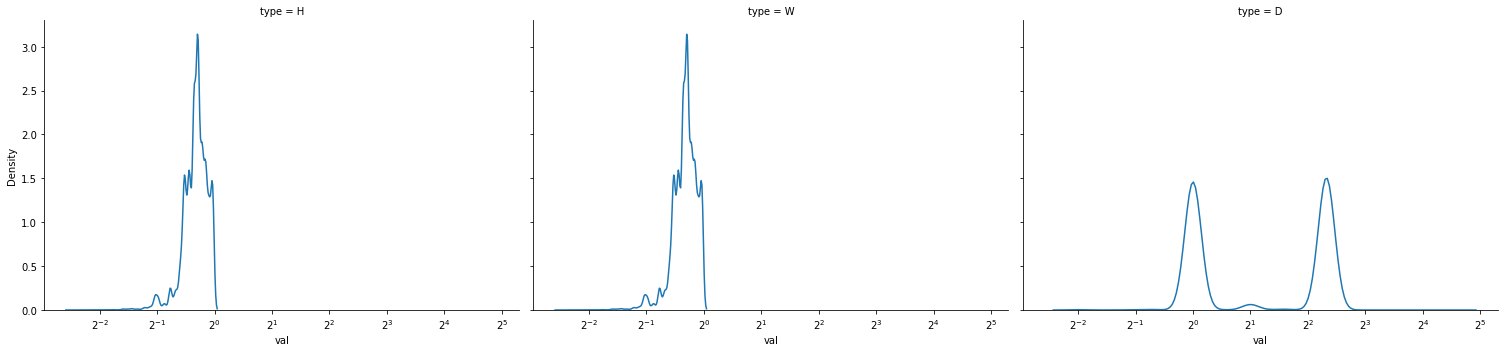

In [54]:
plt.figure(figsize=(5,10))
fig = sns.displot(df, x="val", col="type", kind="kde", aspect=1.4, log_scale=2)

In [56]:
fig.savefig('../../img/DeepLesion_spacing_view.png', dpi=300, bbox_inches = 'tight')